# DSRM Report

# Introducton

The goal of this report is to create an physical activity recognition system which can easily classify the level of heartrate, type and amount of physical activity happening. Physical activity recognition is a complex problem as there are no universal standards. There are alot of variance from one subject to another, but with the help of models we can resolve this problem.

This report utilises the PAMAP2 Physical Activity Monitoring Dataset which has been provided by the University of Sussex which contains 18 different activities participated by 8 male and 1 female.

The information about the type of activities was produced by different sensors.

The HR sampling frequency:9Hz.
The movement of Chest,the wrist on the dominant arm and the side's ankle was measued by inertial measurement units(IMU) at 100Hz sampling frequency.




There are additional files such as:

DataCollectionProtocol.pdf-It shows activities and length of the time.

DescriptionOfActivities.pdf-Description of each activity performed by subject.

PerformedActivitiesSummary.pdf-Table of toal activity.

readme.pdf-Brief information of protocol and data also it indicates issues related to it.

subjectInformation.pdf:Descprition of Subjects.

In part 1: EDA is carried out to get some information of given dataset. The data is loaded with multiple files and then data clscrubbing and missing values has been handled here. 

In part 2: Hypothesis are tested to prove relationship between datasets.

In part 3: Model building, Model Selection  and comparision between the models

# Part 1:Loading our files and Exploratory Data Analysis

### 1.1 Import all the required libraries

In [1]:
#Installing and importing all reuired libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import random
from statistics import mean, stdev
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics.cluster import silhouette_score


Bad key text.latex.preview in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

# 1.2 Loading our Data


There are alot of subfolders which has the data for each participant. Loading first participant data file name- subject101

In [2]:
#Importing dataset of first participant 
myfile=('subject101.dat')
df =pd.read_csv(myfile,sep=' ')
df

,8.38,0,104,30,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.00830026,0.00925038,-0.0175803,-61.1888,-38.9599,-58.1438,1.2,0.7,0.8,0.9
0,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
1,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
2,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
3,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0
4,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.006089,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376411,3772.50,0,NaN,30.5,2.02477,7.29553,5.74194,2.06573,6.57692,5.92695,...,0.048745,-0.008034,0.018600,-58.8381,-36.2397,-11.0980,1.0,0.0,0.0,0.0
376412,3772.51,0,NaN,30.5,2.10836,7.86504,5.85674,2.08754,7.42244,5.87977,...,0.042113,0.024647,0.013375,-58.9537,-36.3379,-11.7170,1.0,0.0,0.0,0.0
376413,3772.52,0,NaN,30.5,2.07163,8.39581,5.77742,2.13833,8.05640,5.90853,...,-0.014889,0.026009,0.025054,-59.1781,-35.8985,-10.9678,1.0,0.0,0.0,0.0
376414,3772.53,0,NaN,30.5,2.19569,8.77634,6.00892,2.11251,8.53989,5.93770,...,0.047026,-0.035531,0.024640,-58.8299,-36.6845,-10.8553,1.0,0.0,0.0,0.0


Here we can clearly see that there are no headings for columns in our dataset. So I am going to provide headings to our columns which are given in readme.pdf  file and the activityID were also provided. There are total 54 columns in dataset.

In [3]:
#Columns as per readme.pdf

#columns related to hand
hand = ['Temperature_H (C)', '3DaccH1_16', '3DaccH2_16', '3DaccH3_16', '3DaccH1_6', '3DaccH2_6',
            '3DaccH3_6', '3Dgyro_H1', '3Dgyro_H2', '3Dgyro_H3', '3Dmag_H1', '3Dmag_H2', '3Dmag_H3',
            'HO1', 'HO2', 'HO3', 'HO4']

#columns related to  Chest
chest =  ['Temperature_C (C)', '3DaccC1_16', '3DaccC2_16', '3DaccC3_16', '3DaccC1_6', '3DaccC2_6',
            '3DaccC3_6', '3Dgyro_C1', '3Dgyro_C2', '3Dgyro_C3', '3Dmag_C1', '3Dmag_C2', '3Dmag_C3',
            'CO1', 'CO2', 'CO3', 'CO4']

#columns related to ankle
ankle =  ['Temperature_A (C)', '3DaccA1_16', '3DaccA2_16', '3DaccA3_16', '3DaccA1_6', '3DaccA2_6',
            '3DaccA3_6', '3Dgyro_A1', '3Dgyro_A2', '3Dgyro_A3', '3Dmag_A1', '3Dmag_A2', '3Dmag_A3',
            'AO1', 'AO2', 'AO3', 'AO4'] 

#aextra columns as per readme.pdf file
Total_collumns = ['Timestamp (s)', 'ActivityID', 'Heart Rate (bpm)'] +hand +chest +ankle
len(Total_collumns)

54

ID for every activity has been provided, labelling them as per our given dataset

In [4]:
#providing id for every activity 
act_ID = {1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling', 7: 'nordic walking', 9: 'watching TV',\
              10: 'computer work', 11: 'car driving',12: 'ascending stairs',13: 'descending stairs',16: 'vacuum cleaning', \
              17: 'ironing',18: 'folding laundry',19: 'house cleaning', 20: 'playing soccer',24: 'jump roping', \
              0: 'other'}

As our data is distributed in two different subfolders(Protocol, Optional) adding all the files and storing in one variable named as dataset

In [5]:
#storing all files in All_files
All_files=      ['subject101.dat',
                 'subject102.dat',
                 'subject103.dat',
                 'subject104.dat',
                 'subject105.dat',
                 'subject106.dat',
                 'subject107.dat',
                 'subject108.dat',
                 'subject109.dat' ]

A new column subject_id needs to be added in our datasets

In [6]:
# Making one dataframe for sub files 101 to 109
dataframe = pd.DataFrame()
for file in All_files:
    processingData = pd.read_table(file, header=None, sep='\s+')
    processingData.columns = Total_collumns
    processingData['subject_id'] = int(file[-5])
    dataframe = dataframe.append(processingData, ignore_index=True)
dataframe.reset_index(drop=True, inplace=True)
dataframe.head()

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3DaccH1_6,3DaccH2_6,3DaccH3_6,...,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,AO1,AO2,AO3,AO4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [7]:
# Uploading data from Protocol folder and making a new column as sunject_id
dataframe1='Dataset/Optional/'
subject_list = os.listdir(dataframe1)
dataset = pd.DataFrame()
for subject in (subject_list):
    dfset = pd.read_csv(dataframe1  + subject,header = None, sep = ' ')
    dfset.columns = Total_collumns
    indexer = subject[9] #have to do like this because subjects are not consecutive, 8th char represents subject number
    dfset['subject_id'] = int(indexer) 
    #do not change from int otherwise subject X from df1 and subject X from df2 will not be the same person
    dataset = pd.concat([dataset,dfset])
dataset

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3DaccH1_6,3DaccH2_6,3DaccH3_6,...,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,AO1,AO2,AO3,AO4,subject_id
0,10.03,0,105.0,33.3125,1.99964,6.94837,5.08845,2.62244,7.73457,4.64028,...,0.009471,0.003633,-43.8463,-2.97306,45.0822,1.000000,0.000000,0.000000,0.000000,1
1,10.04,0,NaN,33.3125,1.80990,6.45729,5.16424,2.19725,6.93762,5.06528,...,0.070031,0.001804,-43.8385,-2.55481,46.8195,1.000000,0.000000,0.000000,0.000000,1
2,10.05,0,NaN,33.3125,1.82756,5.93151,5.78208,2.01408,6.28989,5.44441,...,-0.002170,0.012096,-43.6100,-3.00084,46.5653,1.000000,0.000000,0.000000,0.000000,1
3,10.06,0,NaN,33.3125,1.75760,5.78202,5.97397,1.83344,5.83858,5.92881,...,-0.008545,0.007356,-43.5199,-1.99822,45.5850,1.000000,0.000000,0.000000,0.000000,1
4,10.07,0,NaN,33.3125,1.50670,6.20407,6.27669,1.71564,5.82465,6.27627,...,0.036445,-0.004679,-43.6258,-2.43575,45.5812,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193467,1940.78,0,NaN,24.8750,-6.51915,6.87682,2.34395,-6.67159,6.87843,2.50735,...,0.028883,-0.016737,-40.1550,-18.41770,25.3998,0.276396,-0.692785,0.412759,-0.522766,9
193468,1940.79,0,NaN,24.8750,-6.47548,6.95375,2.49829,-6.71706,6.87873,2.47720,...,0.040632,-0.015746,-39.7605,-18.82270,25.6854,0.276461,-0.692737,0.412749,-0.522804,9
193469,1940.80,0,NaN,24.8750,-6.58698,6.84148,2.57398,-6.79405,6.81875,2.34150,...,0.068296,0.001916,-39.3718,-19.09960,25.6871,0.276468,-0.692669,0.412555,-0.523042,9
193470,1940.81,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.011902,0.006604,-39.5070,-18.96540,25.2609,0.276608,-0.692688,0.412525,-0.522966,9


In [8]:
#Adding all data files together in Big-data
Big_data = pd.concat([dataframe,dataset])
test_section2 = Big_data
Big_data

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3DaccH1_6,3DaccH2_6,3DaccH3_6,...,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,AO1,AO2,AO3,AO4,subject_id
0,8.38,0,104.0,30.000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,NaN,30.000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,NaN,30.000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,NaN,30.000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.000000,0.000000,0.000000,0.000000,1
4,8.42,0,NaN,30.000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193467,1940.78,0,NaN,24.875,-6.51915,6.87682,2.34395,-6.67159,6.87843,2.50735,...,0.028883,-0.016737,-40.1550,-18.4177,25.3998,0.276396,-0.692785,0.412759,-0.522766,9
193468,1940.79,0,NaN,24.875,-6.47548,6.95375,2.49829,-6.71706,6.87873,2.47720,...,0.040632,-0.015746,-39.7605,-18.8227,25.6854,0.276461,-0.692737,0.412749,-0.522804,9
193469,1940.80,0,NaN,24.875,-6.58698,6.84148,2.57398,-6.79405,6.81875,2.34150,...,0.068296,0.001916,-39.3718,-19.0996,25.6871,0.276468,-0.692669,0.412555,-0.523042,9
193470,1940.81,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.011902,0.006604,-39.5070,-18.9654,25.2609,0.276608,-0.692688,0.412525,-0.522966,9


We can use the subjectInformation.pdf to build another dataframe for our analysis since it also contains useful data. The significance of the "dominant hand" label in this data seems little because only "dominant ankle" was indicated as a location for the ankle sensor and not "dominant hand" for the hand sensor.

In [9]:
#Columns as per subjectInformation.pdf file
colmns = ['sub_ID', 'Sex','Age','Height','Weight','Resting HR','Max HR']
subdata = {'sub_ID': [1,2,3,4,5,6,7,8,9],
               'Sex': ['Male','Female', 'Male','Male','Male','Male','Male','Male','Male'],
               'Age':[27,25,31,24,26,26,23,32,31],
               'Height': [182,169,187,194,180,183,173,179,168],
               'Weight': [83,78,92,95,73,69,86,87,65],
               'Resting HR':[75,74,68,58,70,60,60,66,54],
               'Max HR':[193,195,189,196,194,194,197,188,189],
               }

subdataframe = pd.DataFrame(subdata)
subdataframe

,sub_ID,Sex,Age,Height,Weight,Resting HR,Max HR
0,1,Male,27,182,83,75,193
1,2,Female,25,169,78,74,195
2,3,Male,31,187,92,68,189
3,4,Male,24,194,95,58,196
4,5,Male,26,180,73,70,194
5,6,Male,26,183,69,60,194
6,7,Male,23,173,86,60,197
7,8,Male,32,179,87,66,188
8,9,Male,31,168,65,54,189


## 1.3 Data Cleaning

The readme.pdf file indicates alot of issues while collecting the data and it can be clearly seen from above dataset. So before making any valid analysis dataset needs to be cleaned.

The issue related to dataset:

Alot of Nan values because of wireless signal drop.

Data labeled with activityID=0(No physical activity)

Inaccurancy of +/-6g acceleration scale

Due to +/- 6g inaccuracies few columns are inaccurate.

By looking at dataset it can be clearly seen that there are alot of missing values in HeartRate column but it was clearly explained by the frequency sampling deifference of Imu and heart rate sensors. 

There are different types of activities with different id's but it's not labelled in proper manner. For eg-there were no activity IDs 8,14,15,21,22,23,24. 

In [10]:
#checking that there are no specific activity outside of dataset
ID_check = Big_data.loc[Big_data['ActivityID']>24] 
ID_check

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3DaccH1_6,3DaccH2_6,3DaccH3_6,...,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,AO1,AO2,AO3,AO4,subject_id


In [11]:
#just a cell to explore potential errors
check_subject = Big_data.loc[Big_data['subject_id'] == 4] #iterate through subject and id as neccessary
check_subject = check_subject.loc[check_subject['ActivityID'] == 5] 
check_subject

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3DaccH1_6,3DaccH2_6,3DaccH3_6,...,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,AO1,AO2,AO3,AO4,subject_id
1405825,3301.46,5,NaN,27.5,-4.61858,6.44599,-5.9394,-4.5911,6.38731,-5.98033,...,-0.000262,-0.00119,-49.8489,5.81694,2.78633,0.541308,0.325367,0.708377,0.315156,4


The PerformedActivitiesSummary.pdf file provides information about the participants who performed different activities. Few participant dosen't performed few activities.An investigation task was performed on the above above. There also seemed to be one or two more entries for activities ID 12 and 13. Here, a few more copies were discovered, but this was probably caused by the slight sample variations between IMU sensors. When there shouldn't have been one, as was the case with activityid 4 above, there was an entry in activityid 5.

In [12]:
#Checking inaccurate rows with subject_id and ActivityID 
subject_1 = Big_data[((Big_data.subject_id == 1) & (Big_data.ActivityID.isin([10,20])))]
subject_2 = Big_data[((Big_data.subject_id == 2) & (Big_data.ActivityID.isin([9,10,11,18,19,20])))]
subject_3 = Big_data[((Big_data.subject_id == 3) & (Big_data.ActivityID.isin([5,6,7,9,10,11,18,19,20,24])))]
subject_4 = Big_data[((Big_data.subject_id == 4) & (Big_data.ActivityID.isin([5,9,10,11,18,19,20,24])))]
subject_5 = Big_data[((Big_data.subject_id == 5) & (Big_data.ActivityID.isin([9,11,18,20])))]
subject_6 = Big_data[((Big_data.subject_id == 6) & (Big_data.ActivityID.isin([9,11,20])))] 
subject_7 = Big_data[((Big_data.subject_id == 7) & (Big_data.ActivityID.isin([9,10,11,18,19,20,24])))] 
subject_8 = Big_data[((Big_data.subject_id == 8) & (Big_data.ActivityID.isin([9,11])))] 
subject_9 = Big_data[((Big_data.subject_id == 9) & (Big_data.ActivityID.isin([1,2,3,4,5,6,7,9,11,12,13,16,17])))]
eliminate = [subject_1,subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8]

In [13]:
sum= 0
for j in range(len(eliminate)):
    sum += len(eliminate[j])
print('There are',sum, 'entries with inaccurate values')

There are 1 entries with inaccurate values


In [14]:
#Removing activity 0
Big_data = Big_data[Big_data['ActivityID'] != 0] 

#Problems with few columns listed in dataset
eliminate1 = ['3DaccH1_6', '3DaccH2_6','3DaccH3_6', 'HO1', 'HO2', 'HO3', 'HO4',
         '3DaccC1_6', '3DaccC2_6','3DaccC3_6', 'CO1', 'CO2', 'CO3', 'CO4',
         '3DaccA1_6', '3DaccA2_6','3DaccA3_6','AO1', 'AO2', 'AO3', 'AO4'] 

dataframe2 = Big_data.drop(eliminate1, axis = 1) 
dataframe2 = dataframe2.reset_index(drop =True)

#dropping appropriate rows
for j in range(len(eliminate)):
    ind = eliminate[j].index
    dataframe3 = dataframe2.drop(ind)

In [15]:
dataframe3

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3Dgyro_H1,3Dgyro_H2,3Dgyro_H3,...,3DaccA1_16,3DaccA2_16,3DaccA3_16,3Dgyro_A1,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,subject_id
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,...,9.73855,-1.847610,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,...,9.69762,-1.884380,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,...,9.69633,-1.922030,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,...,9.66370,-1.847140,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,...,9.77578,-1.885820,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724948,1936.14,20,NaN,24.875,-6.42779,6.84232,2.80728,-0.021124,0.107389,0.043537,...,9.26409,-0.561116,-3.660880,-0.013752,0.011737,-0.011313,-39.3605,-19.4856,25.9712,9
2724949,1936.15,20,NaN,24.875,-6.39107,6.69028,2.80834,0.020008,0.105153,0.027290,...,9.30900,-0.183274,-3.469820,-0.009593,-0.014075,-0.052507,-38.7226,-19.7765,25.4065,9
2724950,1936.16,20,NaN,24.875,-6.41763,6.57977,3.15471,-0.014853,0.079020,0.041868,...,9.30959,-0.069368,-3.470520,-0.010825,-0.025462,-0.057343,-39.3523,-19.8722,25.9717,9
2724951,1936.17,20,NaN,24.875,-6.46049,6.42730,3.03912,0.012556,0.068029,0.050227,...,9.23414,-0.182800,-3.470590,-0.019402,-0.002942,-0.033522,-38.7082,-20.1618,25.9743,9


The missing values in the Heart rate are been replaced by the last valid values. The Interpolation not been used because with  0.111 seconds there won't be so much changes.

In [16]:
#Making new dataframe to fill heart rate values
Heart_rate = dataframe3['Heart Rate (bpm)'] 
Heart_rate = Heart_rate.fillna(method = 'bfill').fillna(method = 'ffill') 

In [17]:
#Mew dataframe as dataframe3
dataframe3['Heart Rate (bpm)'] = Heart_rate
dataframe3

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3Dgyro_H1,3Dgyro_H2,3Dgyro_H3,...,3DaccA1_16,3DaccA2_16,3DaccA3_16,3Dgyro_A1,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,...,9.73855,-1.847610,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,...,9.69762,-1.884380,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,...,9.69633,-1.922030,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,...,9.66370,-1.847140,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,...,9.77578,-1.885820,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724948,1936.14,20,178.0,24.875,-6.42779,6.84232,2.80728,-0.021124,0.107389,0.043537,...,9.26409,-0.561116,-3.660880,-0.013752,0.011737,-0.011313,-39.3605,-19.4856,25.9712,9
2724949,1936.15,20,178.0,24.875,-6.39107,6.69028,2.80834,0.020008,0.105153,0.027290,...,9.30900,-0.183274,-3.469820,-0.009593,-0.014075,-0.052507,-38.7226,-19.7765,25.4065,9
2724950,1936.16,20,178.0,24.875,-6.41763,6.57977,3.15471,-0.014853,0.079020,0.041868,...,9.30959,-0.069368,-3.470520,-0.010825,-0.025462,-0.057343,-39.3523,-19.8722,25.9717,9
2724951,1936.17,20,178.0,24.875,-6.46049,6.42730,3.03912,0.012556,0.068029,0.050227,...,9.23414,-0.182800,-3.470590,-0.019402,-0.002942,-0.033522,-38.7082,-20.1618,25.9743,9


Now checking for more Nan values because rather than sensor error there are not any possible reasons for Nan values.

In [18]:
# Checking for Nan Values
dataframe3[dataframe3.isna().any(axis=1)]

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3Dgyro_H1,3Dgyro_H2,3Dgyro_H3,...,3DaccA1_16,3DaccA2_16,3DaccA3_16,3Dgyro_A1,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,subject_id
11455,152.21,1,86.0,31.2500,0.554277,9.75846,-0.138475,0.165746,-0.274904,0.041157,...,0.864811,-4.366630,-10.12930,0.254512,-0.113692,-0.120491,-28.2468,35.5646,17.3917,1
11456,152.22,1,86.0,31.2500,1.009900,9.49039,-0.015284,0.250686,-0.362705,0.017707,...,0.784372,-4.592680,-10.28300,0.427240,-0.091716,-0.145038,-29.3660,35.8165,18.0224,1
11585,153.51,1,86.0,31.2500,7.697710,6.77767,-0.483265,0.987565,-0.174650,1.407120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11589,153.55,1,86.0,31.2500,6.374040,5.31060,-0.228732,1.124680,-0.315897,1.353380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
15975,197.41,1,79.0,31.4375,4.342900,-4.49239,-7.769610,0.221033,0.083176,0.011659,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724799,1934.65,20,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.353530,-0.299665,-3.19851,0.015612,0.030957,-0.085891,-39.2636,-18.8513,24.4107,9
2724800,1934.66,20,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.428270,-0.109975,-3.23751,0.025096,0.031765,-0.056712,-40.0183,-19.0695,24.9756,9
2724900,1935.66,20,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.423280,-0.222596,-3.39122,0.012650,0.006531,0.042274,-39.6047,-19.8588,26.2544,9
2724925,1935.91,20,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.462820,-0.451608,-3.27363,-0.034790,0.047308,-0.022063,-38.4835,-19.0160,25.4064,9


There are total 23943 rows which has Nan values that should be removed.

In [19]:
Heart_rate= dataframe3.dropna()
prepared = Heart_rate

In [20]:
# Checking for any duplicate entry but bot including Timestamp (s) ActivityID Heart Rate (bpm)
prepared.loc[prepared.iloc[:,3:].duplicated(), :]

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3Dgyro_H1,3Dgyro_H2,3Dgyro_H3,...,3DaccA1_16,3DaccA2_16,3DaccA3_16,3Dgyro_A1,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,subject_id


From dataframe3 it can be clearly seen that the heart rate for subject9 is very different from other subjects. If we include subject 9 in our analysis result will be inaccurate. 

In [21]:
#Removing participant from dataset
subject9= prepared[((prepared.subject_id == 9))]
subject9idx = subject9.index
prepared = prepared.drop(subject9idx, axis = 0)
prepared

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3Dgyro_H1,3Dgyro_H2,3Dgyro_H3,...,3DaccA1_16,3DaccA2_16,3DaccA3_16,3Dgyro_A1,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.587530,-0.004750,0.037579,-0.011145,...,9.73855,-1.847610,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.36960,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.744670,-0.171710,0.025479,-0.009538,...,9.69762,-1.884380,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.36560,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.823420,-0.238241,0.011214,0.000831,...,9.69633,-1.922030,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.61190,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.899300,-0.192912,0.019053,0.013374,...,9.66370,-1.847140,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.87990,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.092590,-0.069961,-0.018328,0.004582,...,9.77578,-1.885820,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.88470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566075,1802.34,20,76.0,30.750,-9.67904,-2.48860,0.288379,0.054178,0.005046,0.014478,...,9.26796,-0.029877,-3.625550,0.123540,-0.039243,0.010627,-44.4522,-10.7843,9.06518,8
2566076,1802.35,20,76.0,30.750,-9.75008,-2.41113,0.402515,0.003091,-0.041373,0.061613,...,9.34380,0.159491,-3.625950,0.144035,-0.010783,0.005433,-44.9631,-10.7589,9.06336,8
2566077,1802.36,20,76.0,30.750,-9.77985,-2.40883,0.632986,0.002789,-0.015547,0.058264,...,9.34230,0.083875,-3.664080,0.093930,-0.006472,0.012432,-44.3439,-10.0181,8.78101,8
2566078,1802.37,20,76.0,30.750,-9.71149,-2.48696,0.441837,0.011045,-0.007121,0.055302,...,9.41925,0.272923,-3.625880,0.096512,-0.003575,-0.010379,-44.5932,-10.5219,8.35522,8


It can be clearly seen that the dataset is cleaned and noise form dataset is totally removed. There are 31 features available in our entire dataset(not counting Timestamp (s)	ActivityID and subject_id) for our analysis and even it has alot of Nan values in it

In [22]:
#Describing dataset for further analysis
prepared.describe()

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3Dgyro_H1,3Dgyro_H2,3Dgyro_H3,...,3DaccA1_16,3DaccA2_16,3DaccA3_16,3Dgyro_A1,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,subject_id
count,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,...,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06,2.536460e+06
mean,1.558164e+03,9.346507e+00,1.032987e+02,3.293809e+01,-3.862812e+00,3.573364e+00,3.896446e+00,6.255920e-04,3.768388e-02,-5.844984e-03,...,8.992584e+00,-4.472182e-01,-2.763539e+00,6.738661e-03,-2.515453e-02,1.545997e-03,-2.945503e+01,1.804933e+00,1.722354e+01,4.540774e+00
std,1.049675e+03,6.177723e+00,2.620258e+01,1.721296e+00,6.265896e+00,6.582521e+00,4.108740e+00,1.277700e+00,9.285109e-01,1.455002e+00,...,6.012985e+00,6.979528e+00,3.673994e+00,1.019424e+00,5.702234e-01,1.756586e+00,1.976808e+01,2.216362e+01,2.056047e+01,2.444160e+00
min,3.766000e+01,1.000000e+00,5.700000e+01,2.750000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-2.780440e+01,-1.339040e+01,-1.426470e+01,...,-1.536740e+02,-1.574430e+02,-1.589260e+02,-2.907750e+01,-1.812690e+01,-1.647420e+01,-1.728650e+02,-1.404600e+02,-1.523230e+02,1.000000e+00
25%,6.627900e+02,4.000000e+00,8.300000e+01,3.187500e+01,-8.447950e+00,9.322945e-01,1.316680e+00,-3.027698e-01,-1.630530e-01,-2.552837e-01,...,8.279730e+00,-2.473830e+00,-3.889470e+00,-9.915607e-02,-6.082755e-02,-1.516637e-01,-4.094240e+01,-1.298672e+01,3.342690e+00,2.000000e+00
50%,1.322895e+03,9.000000e+00,9.800000e+01,3.331250e+01,-3.677230e+00,3.665570e+00,3.823355e+00,-5.634900e-03,4.850715e-03,-5.469560e-03,...,9.491240e+00,-3.466820e-01,-2.461720e+00,5.696475e-03,-3.716300e-03,1.012600e-04,-3.093430e+01,4.091040e-01,1.872020e+01,5.000000e+00
75%,2.431450e+03,1.600000e+01,1.200000e+02,3.425000e+01,2.974070e-01,6.920933e+00,6.893480e+00,2.657290e-01,2.041770e-01,2.486383e-01,...,9.871170e+00,1.441005e+00,-1.213237e+00,7.424707e-02,6.477278e-02,5.154995e-02,-1.497978e+01,1.774383e+01,3.353720e+01,7.000000e+00
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.411000e+02,2.641580e+01,1.691710e+01,1.433840e+01,...,1.572320e+02,1.561900e+02,1.603430e+02,2.447930e+01,1.358820e+01,1.705130e+01,9.155160e+01,9.424780e+01,1.469000e+02,8.000000e+00


In [23]:
#Labelling activities bt there name instead of numbers
prepared = prepared.replace({'ActivityID': act_ID}) 
prepared.reset_index(drop=True) 

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3Dgyro_H1,3Dgyro_H2,3Dgyro_H3,...,3DaccA1_16,3DaccA2_16,3DaccA3_16,3Dgyro_A1,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,subject_id
0,37.66,lying,100.0,30.375,2.21530,8.27915,5.587530,-0.004750,0.037579,-0.011145,...,9.73855,-1.847610,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.36960,1
1,37.67,lying,100.0,30.375,2.29196,7.67288,5.744670,-0.171710,0.025479,-0.009538,...,9.69762,-1.884380,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.36560,1
2,37.68,lying,100.0,30.375,2.29090,7.14240,5.823420,-0.238241,0.011214,0.000831,...,9.69633,-1.922030,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.61190,1
3,37.69,lying,100.0,30.375,2.21800,7.14365,5.899300,-0.192912,0.019053,0.013374,...,9.66370,-1.847140,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.87990,1
4,37.70,lying,100.0,30.375,2.30106,7.25857,6.092590,-0.069961,-0.018328,0.004582,...,9.77578,-1.885820,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.88470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536455,1802.34,playing soccer,76.0,30.750,-9.67904,-2.48860,0.288379,0.054178,0.005046,0.014478,...,9.26796,-0.029877,-3.625550,0.123540,-0.039243,0.010627,-44.4522,-10.7843,9.06518,8
2536456,1802.35,playing soccer,76.0,30.750,-9.75008,-2.41113,0.402515,0.003091,-0.041373,0.061613,...,9.34380,0.159491,-3.625950,0.144035,-0.010783,0.005433,-44.9631,-10.7589,9.06336,8
2536457,1802.36,playing soccer,76.0,30.750,-9.77985,-2.40883,0.632986,0.002789,-0.015547,0.058264,...,9.34230,0.083875,-3.664080,0.093930,-0.006472,0.012432,-44.3439,-10.0181,8.78101,8
2536458,1802.37,playing soccer,76.0,30.750,-9.71149,-2.48696,0.441837,0.011045,-0.007121,0.055302,...,9.41925,0.272923,-3.625880,0.096512,-0.003575,-0.010379,-44.5932,-10.5219,8.35522,8


The three IMU sensors at each site were supposed to represent the x, y, and z axes in terms of acceleration. In order to create a resultant acceleration column for each site using this data proved useful. However, I wasn't sure what the final number would have shown for other columns, such gyrometer and magnetometer.

In [24]:
prepared['Hand Acceleration']= np.sqrt((prepared['3DaccH1_16'])**2+(prepared['3DaccH2_16'])**2+(prepared['3DaccH3_16'])**2)
prepared['Ankle Acceleration']= np.sqrt((prepared['3DaccA1_16'])**2+(prepared['3DaccA2_16'])**2+(prepared['3DaccA3_16'])**2)
prepared['Chest Acceleration']= np.sqrt((prepared['3DaccC1_16'])**2+(prepared['3DaccC2_16'])**2+(prepared['3DaccC3_16'])**2)
prepared

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3Dgyro_H1,3Dgyro_H2,3Dgyro_H3,...,3Dgyro_A1,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,subject_id,Hand Acceleration,Ankle Acceleration,Chest Acceleration
0,37.66,lying,100.0,30.375,2.21530,8.27915,5.587530,-0.004750,0.037579,-0.011145,...,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.36960,1,10.230952,9.912723,9.791172
1,37.67,lying,100.0,30.375,2.29196,7.67288,5.744670,-0.171710,0.025479,-0.009538,...,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.36560,1,9.855324,9.879026,9.791979
2,37.68,lying,100.0,30.375,2.29090,7.14240,5.823420,-0.238241,0.011214,0.000831,...,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.61190,1,9.496016,9.885166,9.907409
3,37.69,lying,100.0,30.375,2.21800,7.14365,5.899300,-0.192912,0.019053,0.013374,...,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.87990,1,9.526437,9.839102,9.879549
4,37.70,lying,100.0,30.375,2.30106,7.25857,6.092590,-0.069961,-0.018328,0.004582,...,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.88470,1,9.751993,9.956473,9.875840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566075,1802.34,playing soccer,76.0,30.750,-9.67904,-2.48860,0.288379,0.054178,0.005046,0.014478,...,0.123540,-0.039243,0.010627,-44.4522,-10.7843,9.06518,8,9.998005,9.951914,10.052302
2566076,1802.35,playing soccer,76.0,30.750,-9.75008,-2.41113,0.402515,0.003091,-0.041373,0.061613,...,0.144035,-0.010783,0.005433,-44.9631,-10.7589,9.06336,8,10.051847,10.023949,10.156766
2566077,1802.36,playing soccer,76.0,30.750,-9.77985,-2.40883,0.632986,0.002789,-0.015547,0.058264,...,0.093930,-0.006472,0.012432,-44.3439,-10.0181,8.78101,8,10.092007,10.035491,10.130272
2566078,1802.37,playing soccer,76.0,30.750,-9.71149,-2.48696,0.441837,0.011045,-0.007121,0.055302,...,0.096512,-0.003575,-0.010379,-44.5932,-10.5219,8.35522,8,10.034602,10.096720,10.013410


# 1.4 EDA :Distribution of Data for Subjects


Since activity can frequently fluctuate from subject to subject, it will be helpful to look into the factors influencing participant variations that could be contributing to some of the variance in the dataset. We have both Height and weight, so it made sense to combine the two factors into one new feature as BMI measurement.

In [25]:
subdataframe['BMI'] = subdataframe['Weight']/((subdataframe['Height']/100)**2)

#Till subject 8
subdataframe = subdataframe[:8] 
subdataframe

,sub_ID,Sex,Age,Height,Weight,Resting HR,Max HR,BMI
0,1,Male,27,182,83,75,193,25.057360
1,2,Female,25,169,78,74,195,27.309968
2,3,Male,31,187,92,68,189,26.309017
3,4,Male,24,194,95,58,196,25.241790
4,5,Male,26,180,73,70,194,22.530864
5,6,Male,26,183,69,60,194,20.603780
6,7,Male,23,173,86,60,197,28.734672
7,8,Male,32,179,87,66,188,27.152711


In [26]:
subdataframe.describe()

,sub_ID,Age,Height,Weight,Resting HR,Max HR,BMI
count,8.00000,8.00000,8.000000,8.000000,8.000000,8.00000,8.000000
mean,4.50000,26.75000,180.875000,82.875000,66.375000,193.25000,25.367520
std,2.44949,3.19598,7.772433,9.030702,6.545173,3.19598,2.673574
min,1.00000,23.00000,169.000000,69.000000,58.000000,188.00000,20.603780
25%,2.75000,24.75000,177.500000,76.750000,60.000000,192.00000,24.425736
50%,4.50000,26.00000,181.000000,84.500000,67.000000,194.00000,25.775403
75%,6.25000,28.00000,184.000000,88.250000,71.000000,195.25000,27.192025
max,8.00000,32.00000,194.000000,95.000000,75.000000,197.00000,28.734672


Text(0.5, 1.0, 'Figure 1: Box Plot')

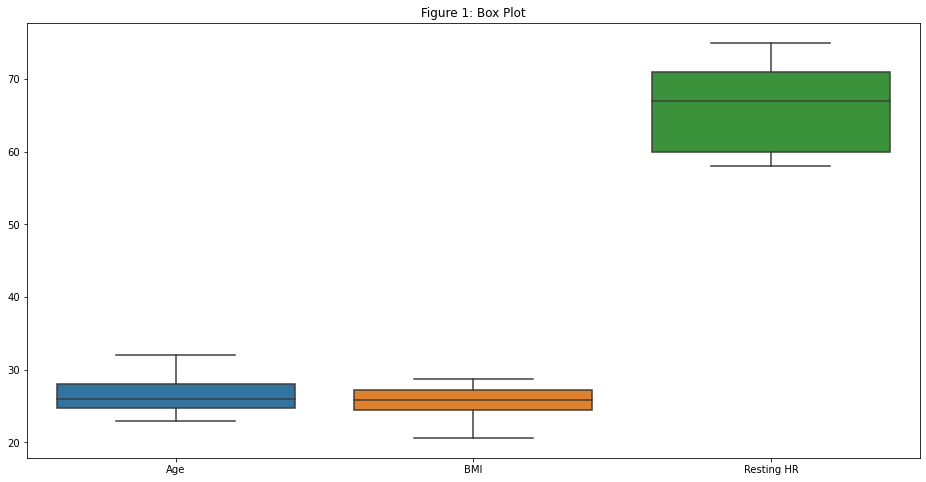

In [27]:
Box_plt= plt.gcf()
Box_plt.set_size_inches(16, 8)
sns.boxplot(data = subdataframe[['Age','BMI','Resting HR']]).set_title('Figure 1: Box Plot')

Figure 1 demonstrates that there was very little variation in the features. All participants were about the same age. The average BMI is 25.77; the range for a healthy BMI is 18.5 to 25. In the first subject df, there are alot people who would be considered to be overweight. Given that studies have shown that being overweight can cause a higher heart rate, it's possible that any conclusions are more applicable to overweight people. The typical heart rate at rest was 66.37.

# 1.5 EDA: Activity Exploration

Analyzing the count of each activity was crucial to determining how evenly distributed the dataset's activities were.

Text(0, 0.5, 'Number of Entries')

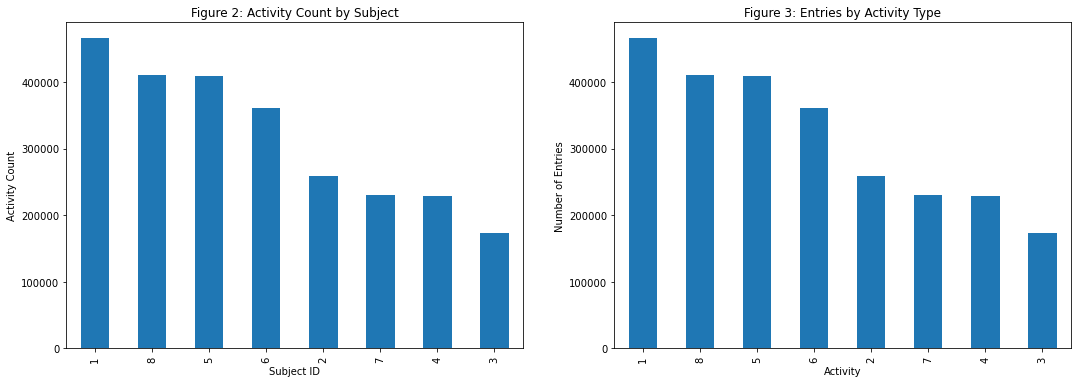

In [28]:
#groping dataframe by ActivityID and subject_id
sub_activities = prepared[['ActivityID','subject_id']]
sub_activities = sub_activities.groupby('subject_id').count().sort_values('ActivityID',ascending = False)

#dcount for activities and sparticipants
count = prepared[['ActivityID','subject_id']].groupby('ActivityID').count().sort_values('subject_id',ascending = False)
count

#plotting dataframe
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (18,6))
sub_activities.plot.bar(ax = axes[0])
sub_activities.plot.bar(ax = axes [1])

#labelling
axes[0].legend()
axes[1].legend()
axes[0].get_legend().set_visible(False)
axes[1].get_legend().set_visible(False) #dont actually need a legend
axes[0].set_title('Figure 2: Activity Count by Subject')
axes[0].set_xlabel('Subject ID')
axes[0].set_ylabel('Activity Count')
axes[1].set_title('Figure 3: Entries by Activity Type')
axes[1].set_xlabel('Activity')
axes[1].set_ylabel('Number of Entries')

Each participant's total number of entries is shown in Figure 1. Although it is clear that there are quite a few changes across individuals, there are still more than 120,000 records for each person, thus these variations are unlikely to have an impact on our conclusions. To perhaps remove bias amongst participants for any particular activity, there should be adequate data from each participant.

The activity "playing soccer" in figure 2 contains little data, thus it will be crucial to take this into account while modelling; it could be more challenging to identify this activity accurately. Figure 4 illustrates how each activity was broken down per participant.

Text(0.5, 1.0, 'Figure 4: Stacked Bar Chart of Activity by subject_id')

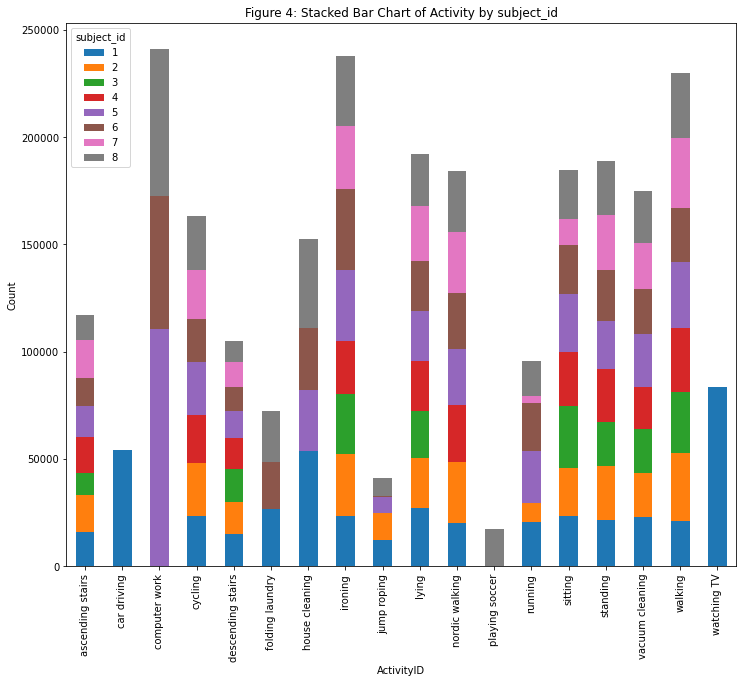

In [29]:
fig2 = prepared[['ActivityID','subject_id']]
fig2.groupby(['ActivityID', 'subject_id']).size().unstack().plot(kind='bar', stacked=True,figsize = (12,10))
plt.ylabel('Count')
plt.title('Figure 4: Stacked Bar Chart of Activity by subject_id')

# 1.6 EDA : Heart Rate Exploration

It was crucial to identify the variations between participant and activity since heart rate is likely to be a significant element in our investigation. Figure 3 demonstrates that there are only very slight variations in each participant's mean heart rate across all activities. The mean heart rate for all activities did not seem to be correlated with the resting heart rate given in section 1.4.

According to Figure 6, more strenuous activities have a higher mean heart rate. The "DataCollectionProtocol" file seems to categorise tasks according to their metabolic equivalent, or "MET," score. However, this file only includes the "Protocol" activities, not the "Optional" ones. By comparing the heart rates of other specified MET activities, we may use figure 6 to assess the intensity of "Optional Activities." We specify intensity levels.

Text(0, 0.5, 'Heart Rate (bpm)')

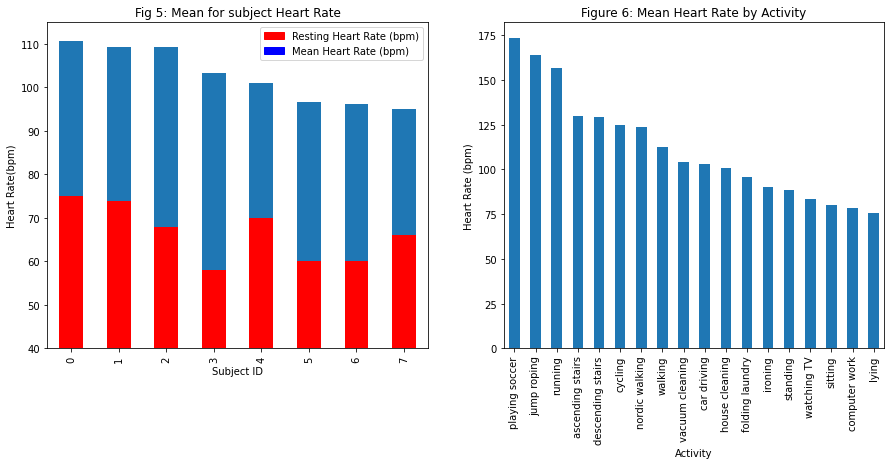

In [30]:
dataframe_heartrate = prepared[['subject_id', 'ActivityID','Heart Rate (bpm)']]
subject_heart = dataframe_heartrate[['Heart Rate (bpm)','subject_id']].groupby('subject_id').mean().sort_values('Heart Rate (bpm)', ascending = False)
activity_heart = dataframe_heartrate[['Heart Rate (bpm)','ActivityID']].groupby('ActivityID').mean().sort_values('Heart Rate (bpm)', ascending = False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,6))
subject_heart.plot.bar(ax = axes[0])
subdataframe['Resting HR'].plot.bar(ax=axes[0],color = 'r')
activity_heart.plot.bar(ax = axes [1])
axes[0].set_title('Fig 5: Mean for subject Heart Rate')
axes[0].set_xlabel('Subject ID')
red_patch = mpatches.Patch(color='red', label='Resting Heart Rate (bpm)')
blue_patch = mpatches.Patch(color='blue', label='Mean Heart Rate (bpm)')
axes[0].legend(handles=[red_patch,blue_patch])
#axes[0].get_legend().set_visible(False)
axes[1].get_legend().set_visible(False)
axes[0].set_ylim([40,115]) #nobody had HR less than 40
axes[0].set_ylabel('Heart Rate(bpm)')
axes[1].set_title('Figure 6: Mean Heart Rate by Activity')
axes[1].set_xlabel('Activity')
axes[1].set_ylabel('Heart Rate (bpm)')

According to Figure 6, more strenuous activities have a higher mean heart rate. The "DataCollectionProtocol" file seems to categorise tasks according to their metabolic equivalent, or "MET," score. However, this file only includes the "Protocol" activities, not the "Optional" ones. By comparing the heart rates of other specified MET activities, we may use figure 6 to assess the intensity of "Optional Activities." We specify intensity levels.

Text(0.5, 1.0, 'Fig 7: Heart Rate for Activities and subject')

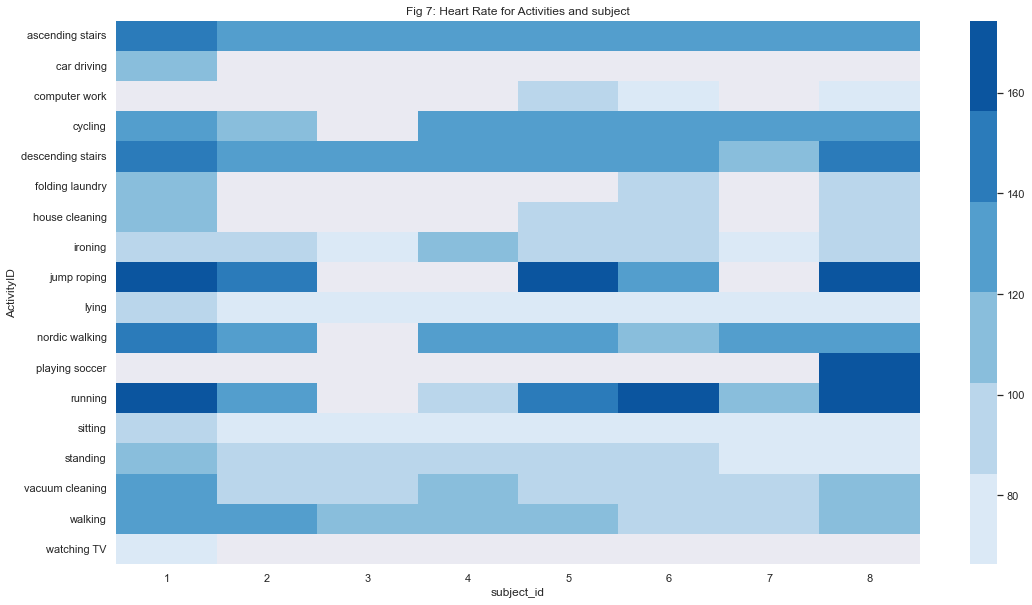

In [31]:
heart_distribution = dataframe_heartrate.groupby(['ActivityID','subject_id'], as_index = False).mean()[['ActivityID','subject_id','Heart Rate (bpm)']].pivot(index = 'ActivityID',columns = 'subject_id', values = 'Heart Rate (bpm)')
colormap = sns.color_palette("Blues")
sns.set(rc = {'figure.figsize':(18,10)})
sns.heatmap(heart_distribution, cmap = colormap).set_title('Fig 7: Heart Rate for Activities and subject')

Figure 7 illustrates the participant's heart rate variability by activity. Although there is still a lot of diversity amongst people, it does appear generally that more strenuous activities such IDs 5, 12, 20, and 24 had a higher heart rate on average.


It's also noteworthy to note that participant 8 had entries with heart rate values that were higher than the upper limit heart rate specified in section 2.4. This either shows that the data input is erroneous or that the person could have a medical issue. In either scenario, the statistics for the activities participant 8 engaged in may be highly biassed. There were 8,855 observed activities that were higher than the maximum heart rate, however given that this person had more than 400,000 data entries, it seems doubtful that these observations had a significant impact.

In [32]:
#checking for  heart rate of subject 9
dataset1 = prepared.loc[prepared['subject_id'] == 8] 
dataset1 = dataset1.loc[dataset1['Heart Rate (bpm)'] > 190] 
dataset1

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3Dgyro_H1,3Dgyro_H2,3Dgyro_H3,...,3Dgyro_A1,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,subject_id,Hand Acceleration,Ankle Acceleration,Chest Acceleration
1924917,3602.54,running,191.0,30.8125,11.36530,-2.79275,5.954380,-1.242900,-1.939580,-1.274350,...,-1.758450,-0.730068,-5.731600,-38.9025,18.33790,24.3688,8,13.131037,54.754720,4.251598
1924918,3602.55,running,191.0,30.8125,12.11340,-3.89882,5.969310,-1.543530,-1.680870,-1.793010,...,0.288289,-0.535504,-4.272590,-38.9897,16.79940,25.0794,8,14.055886,50.411851,2.775960
1924919,3602.56,running,191.0,30.8125,12.56450,-5.94802,6.329370,-1.724660,-1.325160,-2.327860,...,1.568790,-0.796673,-2.288930,-39.2373,16.29600,24.7955,8,15.274375,47.409489,2.494594
1924920,3602.57,running,191.0,30.8125,12.52060,-8.14586,6.605540,-1.746460,-1.040880,-2.766020,...,2.296840,-0.726102,-0.877876,-39.1049,16.29060,25.2214,8,16.332594,45.992831,2.889782
1924921,3602.58,running,191.0,30.8125,11.56630,-11.01930,6.908830,-1.400230,-0.785028,-3.136770,...,3.075110,-0.185409,0.303761,-39.2393,16.16610,24.3701,8,17.405062,39.415576,3.459263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554850,1681.53,playing soccer,191.0,30.7500,-9.40489,-2.26099,0.522642,-0.083548,-0.011643,0.012976,...,0.022180,0.017612,-0.024555,-34.9774,4.02760,40.4262,8,9.686960,10.071598,10.097176
2554851,1681.54,playing soccer,191.0,30.7500,-9.40409,-2.33654,0.561396,-0.034086,-0.070624,-0.004158,...,-0.039531,0.034239,-0.042680,-34.7266,4.01384,40.0016,8,9.706261,10.062469,9.511460
2554852,1681.55,playing soccer,191.0,30.7500,-9.56247,-2.41292,0.366844,-0.029236,-0.097671,-0.017502,...,-0.049251,-0.004990,-0.021804,-35.3673,3.91578,39.5740,8,9.869022,9.960606,9.996395
2554853,1681.56,playing soccer,191.0,30.7500,-9.63778,-2.37440,0.365586,-0.023186,-0.057408,-0.016959,...,-0.015017,-0.027262,-0.014833,-34.5973,4.00781,40.1439,8,9.932685,9.882265,10.044341


In [33]:
dataset1[['Heart Rate (bpm)','ActivityID']].groupby('ActivityID').count()

,Heart Rate (bpm)
ActivityID,
jump roping,4083
playing soccer,697
running,2691


# 1.7 EDA : Activity Time Estimation

According to the project brief, conclusions that allow the future system to calculate the length of an action must be drawn. At first, this was challenging since the timestamps for the "Optional" and "Protocol" datasets overlapped. As a result, we only took into account the "Protocol" sets because we had precise timestamps and durations for these activities supplied in the "DataCollectionProtocol" file.

In [34]:
amount_t = prepared[((prepared.subject_id == 8) & (prepared.ActivityID.isin([ 'lying','sitting','standing','ironing','vacuum cleaning','ascending stairs','descending stairs','walking','nordic walking','ironing','cycling','running','jump roping'])))]

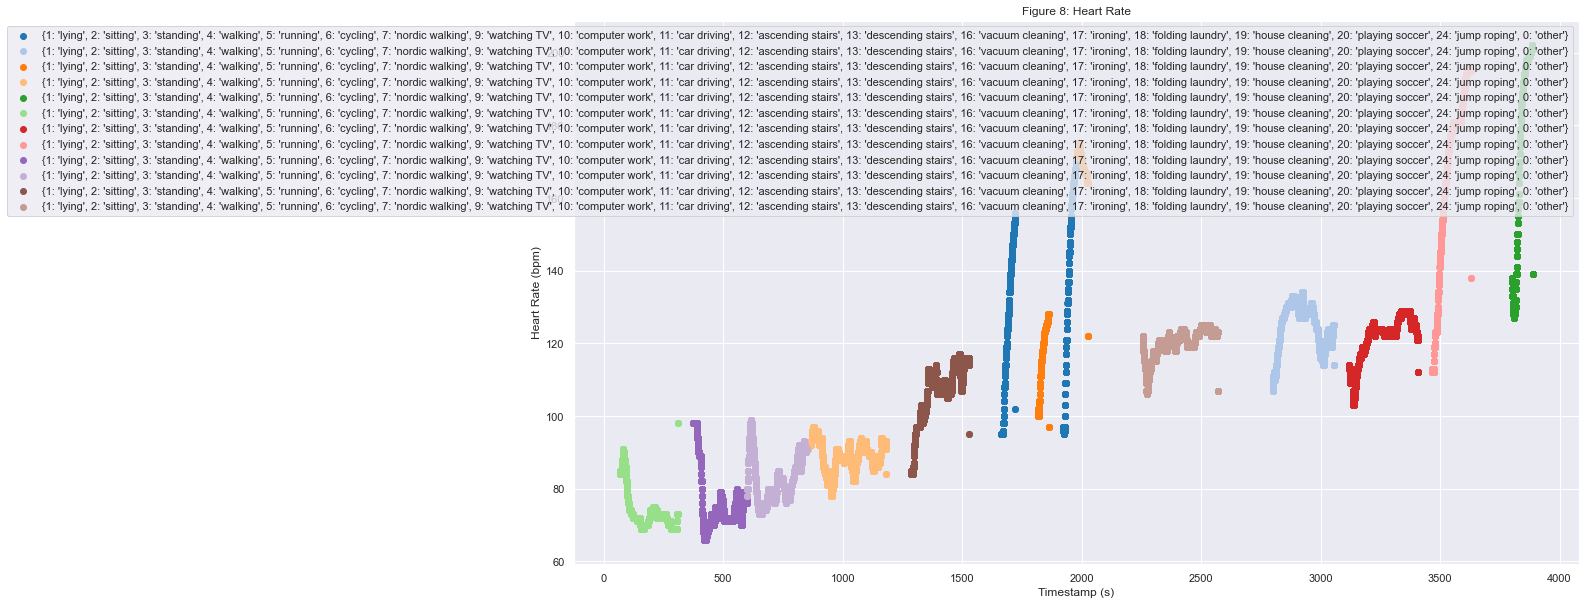

In [35]:
fig3 = plt.gcf()
figsize = (18, 10)

#standard plt colors would repeat so changing default color selection
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors) 

for activity, data in amount_t.groupby('ActivityID'):
    plt.scatter(data['Timestamp (s)'], data['Heart Rate (bpm)'], label=act_ID )
    plt.xlabel('Timestamp (s)')
    plt.ylabel('Heart Rate (bpm)')
    plt.title('Figure 8: Heart Rate')
    plt.legend()


The action of "descending stairs" appears to be reliant on the action of "ascending stairs" since ascending steps is a strenuous exercise and because figure 8 illustrates that descending happens immediately after ascending. The first instance of descent in the "DataCollectionProtocol" page occurs after a brief gap during which time the heart rate is given time to recover, however in the second instance, it succeeds stair climb. This is likely the cause of the two activities in figure 6's mean heart rates being so close together.

It's interesting to note that after every action, the heart rate seems to decrease. A rule-based derivative system will likely perform poorly because this is not always the case (for instance, while sitting or standing).

In [36]:
def time(test_section2,subject_id,activity,sfdata):
    diff = test_section2.loc[test_section2['subject_id'] == subject_id]
    diff = diff[['Heart Rate (bpm)','ActivityID']]
    activity_df = diff.loc[diff['ActivityID'] == activity]
    rws = activity_df.iloc[::sfdata,:]
    ammount = len(rws)
    total = 1/sfdata
    time_2 = total*ammount
    return time_2


In [37]:
act_lying = time(test_section2,8,1,9)
act_lying

298.3333333333333

In [38]:
act_stand = time(test_section2,8,3,9) ##test section2 badal
act_stand

310.66666666666663

In [39]:
act_run = time(test_section2,8,5,9)
act_run

204.1111111111111

This approach has a number of drawbacks. For instance, we may lose 0.111 seconds of data if the activity terminated before the next sample could be obtained. The idea that the same action might be performed more than once throughout distinct time periods is also not taken into account by this technique.

# 1.8 EDA : Temperature Exploration

Heart rate is unquestionably a significant element, as previous EDA tasks have demonstrated. Given that heart rate is most likely to rise with the level of exercise, temperature should be examined for the same purpose.


dividing activites into three categories such as indoor, home and outdoor. 

Indoor-'lying', 'computer work', 'sitting', 'standing', 'car driving', 'folding laundry', 'house cleaning', 'ironing', 'watching TV'.

home-'vacuum cleaning', 'descending stairs', 'walking', 'cycling', 'nordic walking'

outdoor-'running','playing soccer','jump roping','ascending stairs'

Text(0.5, 1.0, 'Figure 9c: Chest Temperature')

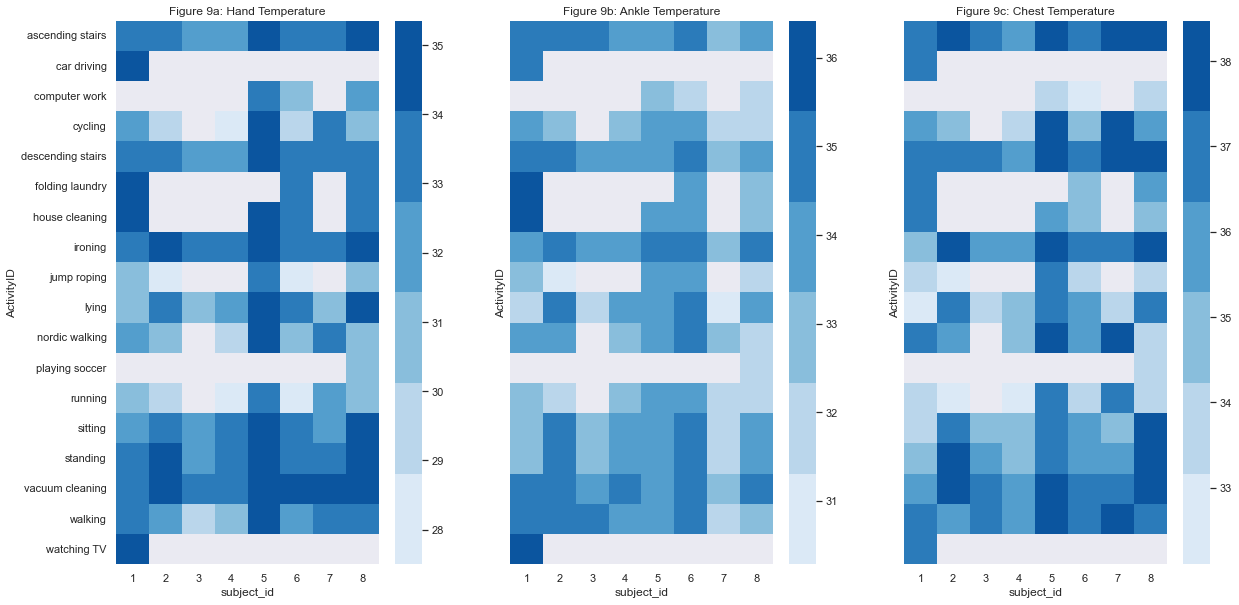

In [40]:
celsius_df = prepared[['ActivityID','Temperature_H (C)','Temperature_A (C)', 'Temperature_C (C)','subject_id']]
hand_celsius = celsius_df.groupby(['ActivityID','subject_id'], as_index = False).mean()[['ActivityID','subject_id','Temperature_H (C)']].pivot(index = 'ActivityID',columns = 'subject_id', values = 'Temperature_H (C)')
ankle_celsius = celsius_df.groupby(['ActivityID','subject_id'], as_index = False).mean()[['ActivityID','subject_id','Temperature_A (C)']].pivot(index = 'ActivityID',columns = 'subject_id', values = 'Temperature_A (C)')
chest_celsius = celsius_df.groupby(['ActivityID','subject_id'], as_index = False).mean()[['ActivityID','subject_id','Temperature_C (C)']].pivot(index = 'ActivityID',columns = 'subject_id', values = 'Temperature_C (C)')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,10),sharey=True) #conserve space by sharing y axis

sns.heatmap(hand_celsius,cmap=colormap,ax = axes[0]) #colormap defined in earlier cells
sns.heatmap(ankle_celsius,cmap=colormap,ax = axes[1])
sns.heatmap(chest_celsius,cmap=colormap,ax = axes[2])


axes[0].set_title('Figure 9a: Hand Temperature')
axes[1].set_title('Figure 9b: Ankle Temperature')
axes[2].set_title('Figure 9c: Chest Temperature')

In [41]:
#Distributing activities in three categories

act_list1 = ['lying','computer work','sitting','standing','car driving','folding laundry', 
              'house cleaning', 'ironing','watching TV']
act_list2 =['vacuum cleaning','descending stairs','walking', 'cycling','nordic walking']
act_list3 = ['running','playing soccer','jump roping','ascending stairs']
directory = {}
for j in act_list1:
    directory[j] = 'indoor'
    for i in act_list2:
        directory[i] = 'home'
        for k in act_list3:
            directory[k] = 'outdoor'            
dataframe_temprature = celsius_df
dataframe_temprature = dataframe_temprature.replace(directory)
dataframe_temprature

,ActivityID,Temperature_H (C),Temperature_A (C),Temperature_C (C),subject_id
0,indoor,30.375,30.7500,32.1875,1
1,indoor,30.375,30.7500,32.1875,1
2,indoor,30.375,30.7500,32.1875,1
3,indoor,30.375,30.7500,32.1875,1
4,indoor,30.375,30.7500,32.1875,1
...,...,...,...,...,...
2566075,outdoor,30.750,31.8125,34.2500,8
2566076,outdoor,30.750,31.8125,34.2500,8
2566077,outdoor,30.750,31.8125,34.2500,8
2566078,outdoor,30.750,31.8125,34.2500,8


In [42]:
h_celsius = dataframe_temprature.groupby(['ActivityID','subject_id'], as_index = False).mean()[['ActivityID','subject_id','Temperature_H (C)']].pivot(index = 'ActivityID',columns = 'subject_id', values = 'Temperature_H (C)')
a_celsius = dataframe_temprature.groupby(['ActivityID','subject_id'], as_index = False).mean()[['ActivityID','subject_id','Temperature_A (C)']].pivot(index = 'ActivityID',columns = 'subject_id', values = 'Temperature_A (C)')
c_celsius = dataframe_temprature.groupby(['ActivityID','subject_id'], as_index = False).mean()[['ActivityID','subject_id','Temperature_C (C)']].pivot(index = 'ActivityID',columns = 'subject_id', values = 'Temperature_C (C)')

# 1.9 EDA: Timestap Exploration

Text(0.5, 1.0, 'Figure 11f: Playing Soccer')

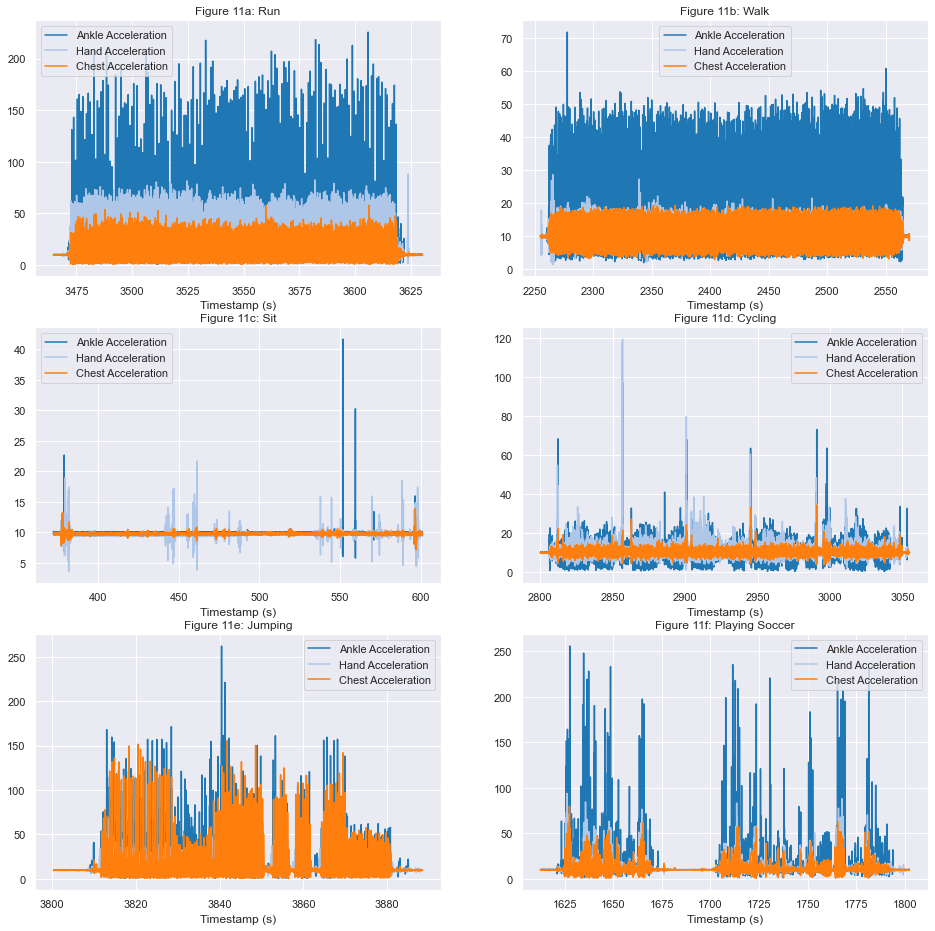

In [43]:
timestap = prepared.loc[prepared['subject_id'] == 8]
running = timestap.loc[timestap['ActivityID'] == 'running'] 
walking = timestap.loc[timestap['ActivityID'] == 'walking']
sitting = timestap.loc[timestap['ActivityID'] == 'sitting']
cycling = timestap.loc[timestap['ActivityID'] == 'cycling']
jumping = timestap.loc[timestap['ActivityID'] == 'jump roping']
football= timestap.loc[timestap['ActivityID'] == 'playing soccer']
fig, ax = plt.subplots(3,2,figsize = (16,16))
running.plot.line(x='Timestamp (s)', y = ['Ankle Acceleration','Hand Acceleration','Chest Acceleration'], ax = ax[0,0])
walking.plot.line(x='Timestamp (s)', y = ['Ankle Acceleration','Hand Acceleration','Chest Acceleration'], ax = ax[0,1])
sitting.plot.line(x='Timestamp (s)', y = ['Ankle Acceleration','Hand Acceleration','Chest Acceleration'], ax = ax[1,0])
cycling.plot.line(x='Timestamp (s)', y = ['Ankle Acceleration','Hand Acceleration','Chest Acceleration'], ax = ax[1,1])
jumping.plot.line(x='Timestamp (s)',y = ['Ankle Acceleration','Hand Acceleration','Chest Acceleration'], ax = ax[2,0])
football.plot.line(x='Timestamp (s)', y = ['Ankle Acceleration','Hand Acceleration','Chest Acceleration'], ax = ax[2,1])
ax[0,0].set_title('Figure 11a: Run')
ax[0,1].set_title('Figure 11b: Walk')
ax[1,0].set_title('Figure 11c: Sit')
ax[1,1].set_title('Figure 11d: Cycling')
ax[2,0].set_title('Figure 11e: Jumping')
ax[2,1].set_title('Figure 11f: Playing Soccer')

It should be noticed that all acceleration in Figure 11 begins at 9.81 because of the gravitational effect. This could have been changed to 0, but it wouldn't have made much of a difference in terms of modelling. There are a variety of activities that may be used for this work, all of which have relatively varied features, such as stationary, variable pace, and constant speed.

Running is depicted in Figure 11a, which demonstrates that a steady pace was kept. In comparison to the other figures, the acceleration's magnitude is rather large. Figure 11b shows a person walking. Due to the slower speed, it is clear that it exhibits the same profile as figure 11a, but with a lesser acceleration. Figure 11c, which depicts sitting, demonstrates that the accelerometer generally always reads "0." Small fluctuations are likely seen as a result of factors like location changes.

Jump rope is shown in Figure 11e, which depicts how hands move very little in the cartesian plane (rather they rotate almost in place which would be present in gyro data). Small pauses have been seen, which most likely signify, for example, becoming entangled in the rope. Figure 11f is intriguing because it illustrates how soccer is not always a game of continual motion. The findings on ankle acceleration show very large jumps that most likely correspond to ball kicks. Depending on how strong the kick is, this fluctuates in size. Additionally, there are moments when the athlete does nothing but jog.

# 1.10 Conclusion after conducting EDA

The various useful features that can be used to determine the type of activity and its duration have been demonstrated in Section 1. Even though it is almost certain that other features, like readings from the gyroscope, will likely have an impact on models, exploring each feature is very repetitive. I will use all unexplored features to model because I am confident that these features alone would be sufficient to accurately classify activity. The legitimacy of the assertions made in this part will be additionally examined in area 2.

# Part 2: Hypothesis

# 2.1 Correlation between Chest temprature and heartrate

Ha: If heart rate depends on temprature, then heart rate will increase as temprature increases.

H0: heart rate is independent from temprature.

Conducting a pearson correlation test between temprature and heartrate.

In [44]:
lists = prepared.replace(directory)
lists_mean = lists[['ActivityID','Heart Rate (bpm)']].groupby('ActivityID').mean()
lists_mean

,Heart Rate (bpm)
ActivityID,
home,117.708270
indoor,86.072695
outdoor,147.137418


In [45]:
indoor_df = lists[lists['ActivityID'] == 'indoor']
indoor_df = indoor_df['Heart Rate (bpm)']
home_df = lists[lists['ActivityID'] == 'home']
home_df = home_df['Heart Rate (bpm)']
outdoor_df = lists[lists['ActivityID'] == 'outdoor']
outdoor_df = outdoor_df['Heart Rate (bpm)']

In [46]:
indoor1 = list(np.array(indoor_df)) 
home1 = list(np.array(home_df))
outdoor1= list(np.array(outdoor_df))
indoor2 = random.sample(indoor1, 4000)

home2 = random.sample(home1,4000)
outdoor2 = random.sample(outdoor1,4000)

#as im only sampling a small amount of df choose different part of the sample each time
def funcc(data):
    return [random.choice((data)) for _ in data]

#using shapiro normality method [8]
#the null hypothesis is that the data is normal
def func(sample):
    testting = []
    for i in range(10):
        bs = func(sample)
        st,norm = stats.shapiro(bs)
        test11.append(norm)
        
    return mean(testting)

In [47]:
print(' indoor mean:',mean(indoor2))
print('home mean:',mean(home2))
print('outdoor mean:',mean(outdoor2))


 indoor mean: 85.82325
home mean: 117.68975
outdoor mean: 147.51225


The pearson correlation is: -0.002056237297303021 and the p-value is: 0.3388968754594581
The Pearson test Failed.


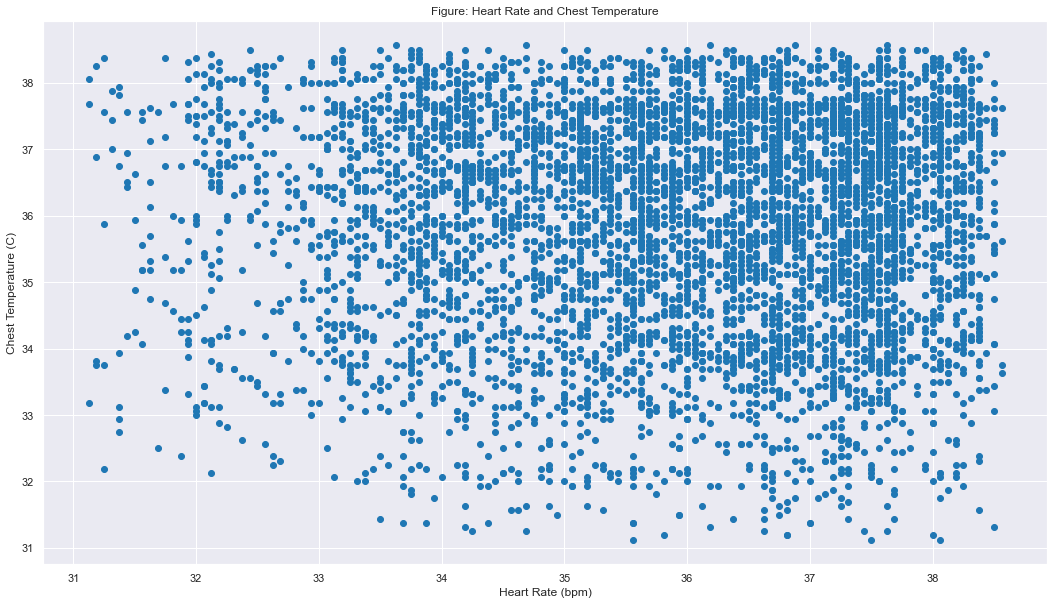

In [48]:
test41 = prepared[['Heart Rate (bpm)','Temperature_C (C)']]
data_chest = list(np.array(test41['Temperature_C (C)']))
data_heart = list(np.array(test41['Heart Rate (bpm)']))

data_chest = random.sample(data_chest,6000) 
data_heart = random.sample(data_chest,6000)

plt.scatter(data_heart,data_chest)
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Chest Temperature (C)')
plt.title('Figure: Heart Rate and Chest Temperature')

relation = []
pvalue = []

for i in range(10):
    test51 = funcc(data_chest)
    test52 = funcc(data_heart)
    corr, p_test = stats.pearsonr(test52,test51)
    relation.append(corr)
    pvalue.append(p_test)
    
print('The pearson correlation is:',mean(relation),"and the p-value is:",mean(pvalue))
if mean(pvalue) > 0.05:
    print('The Pearson test Failed.')
else:
    print('The Pearson test succeed.')

For 6000 random samples, above Figure displays the correlation between heart rate and chest temperature. Although the temperature of the hand and ankle were also measured, the link between the two was quite comparable and not worth separating for this test. There is essentially no association between the two, according to the Pearson's correlation coefficient, which was approximately 0. Since the p-value is substantially higher than 0.05, the null hypothesis is accepted here.

# Part 3: Model Building

## 3.1 Dimensionality  Reduction

There are 37 columns of data in all as of right now. It would be impossible to model with this dimensionality. Simple logic allows us to remove some columns, such as timestamps, which are used to track progress but have no relation to the type of activity. The temperature column looks quite negligible, thus there is no need to discriminate by participant.

Eliminating the beginning and conclusion of an activity was the first step to reducing the overall amount of data. These are only temporary intervals when activity is not occurring. This may delete genuine information about the behaviour even though 30 seconds of data from each side have been removed. To be true, this limits the data we have to those associated with that activity.

In [49]:
indexes = []
for j in range(1,9):
    for i in directory:
        #For all subjectss
        data_acti = prepared[prepared['ActivityID'] == i] #get activity df
        for_subject_id =  data_acti[data_acti['subject_id'] == j] #then get participant for one activity
        initial_indexes = np.asarray(for_subject_id[:3000].index) #get first 30 secs of data
        last_indexes = np.asarray(for_subject_id[-3000:].index) #get last 30 secs of data
        indexes.extend([initial_indexes,last_indexes])   

In [50]:
list9 = [item for list10 in indexes for item in list10]
drop_dataset = prepared.drop(list9,axis=0)
drop_dataset

,Timestamp (s),ActivityID,Heart Rate (bpm),Temperature_H (C),3DaccH1_16,3DaccH2_16,3DaccH3_16,3Dgyro_H1,3Dgyro_H2,3Dgyro_H3,...,3Dgyro_A1,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,subject_id,Hand Acceleration,Ankle Acceleration,Chest Acceleration
3000,67.66,lying,100.0,30.6875,6.04289,4.98560,5.54051,-0.005100,0.009256,0.023031,...,0.016006,0.006970,0.020230,-13.6674,45.1846,-6.63805,1,9.595310,10.131352,9.702424
3001,67.67,lying,100.0,30.6875,6.12114,4.98569,5.61866,0.019801,-0.030706,0.013710,...,-0.019115,0.028426,0.010098,-13.7790,45.0798,-6.76204,1,9.689933,10.041853,9.668236
3002,67.68,lying,100.0,30.6875,6.12061,4.90981,5.61891,0.010058,-0.026232,0.000358,...,0.024533,-0.017164,-0.002818,-13.8808,44.4199,-6.64446,1,9.650920,10.066084,9.745773
3003,67.69,lying,100.0,30.6875,6.20341,4.98679,5.81232,0.014155,-0.028553,0.004515,...,0.020319,0.010627,-0.001781,-14.3259,44.7535,-5.64704,1,9.855630,10.123946,9.451569
3004,67.70,lying,100.0,30.6875,6.12114,4.98569,5.61866,0.014067,0.005227,-0.013615,...,0.068253,-0.034286,-0.013104,-13.8846,44.9651,-6.14350,1,9.689933,10.259955,9.537047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562954,1771.13,playing soccer,182.0,30.8125,-8.38758,1.84990,2.87174,-0.945420,-1.206060,-2.268720,...,2.142150,0.532291,-0.040932,-37.3893,-14.1653,29.80140,8,9.056518,10.977998,9.328780
2562955,1771.14,playing soccer,182.0,30.8125,-8.06273,2.14643,2.37527,-0.951695,-1.197600,-2.291090,...,2.661780,0.532162,-0.060047,-38.0381,-13.3588,30.36550,8,8.675061,10.601189,9.211507
2562956,1771.15,playing soccer,182.0,30.8125,-7.96006,2.33223,2.02980,-0.952514,-1.116120,-2.307690,...,3.053020,0.487765,-0.088580,-38.1877,-12.3214,30.36380,8,8.539434,10.171370,9.313063
2562957,1771.16,playing soccer,182.0,30.8125,-7.82576,2.78130,1.45298,-1.007300,-1.098090,-2.286100,...,3.392200,0.390456,-0.146105,-37.9236,-12.5912,30.64870,8,8.431447,9.969411,9.375431


In [51]:
data_set = drop_dataset.drop(['Timestamp (s)','subject_id','3DaccH1_16','3DaccH2_16','3DaccH3_16',
                                        '3DaccA1_16','3DaccA2_16','3DaccA3_16','3DaccC1_16','3DaccC2_16','3DaccC3_16','Temperature_H (C)',
                                         'Temperature_C (C)','Temperature_A (C)'], axis=1)
data_set

,ActivityID,Heart Rate (bpm),3Dgyro_H1,3Dgyro_H2,3Dgyro_H3,3Dmag_H1,3Dmag_H2,3Dmag_H3,3Dgyro_C1,3Dgyro_C2,...,3Dmag_C3,3Dgyro_A1,3Dgyro_A2,3Dgyro_A3,3Dmag_A1,3Dmag_A2,3Dmag_A3,Hand Acceleration,Ankle Acceleration,Chest Acceleration
3000,lying,100.0,-0.005100,0.009256,0.023031,-14.2349,15.08130,-58.1632,0.008244,-0.037095,...,-54.708800,0.016006,0.006970,0.020230,-13.6674,45.1846,-6.63805,9.595310,10.131352,9.702424
3001,lying,100.0,0.019801,-0.030706,0.013710,-14.1295,14.20630,-58.2895,0.012170,-0.019094,...,-54.946800,-0.019115,0.028426,0.010098,-13.7790,45.0798,-6.76204,9.689933,10.041853,9.668236
3002,lying,100.0,0.010058,-0.026232,0.000358,-14.0273,15.18850,-58.9745,0.027844,-0.005621,...,-54.708500,0.024533,-0.017164,-0.002818,-13.8808,44.4199,-6.64446,9.650920,10.066084,9.745773
3003,lying,100.0,0.014155,-0.028553,0.004515,-14.1205,15.18200,-58.0477,-0.009061,-0.025676,...,-54.350700,0.020319,0.010627,-0.001781,-14.3259,44.7535,-5.64704,9.855630,10.123946,9.451569
3004,lying,100.0,0.014067,0.005227,-0.013615,-13.9149,14.85410,-58.8637,0.005565,-0.073869,...,-54.707300,0.068253,-0.034286,-0.013104,-13.8846,44.9651,-6.14350,9.689933,10.259955,9.537047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562954,playing soccer,182.0,-0.945420,-1.206060,-2.268720,46.9706,8.04028,-24.7800,0.082125,0.877344,...,-1.036390,2.142150,0.532291,-0.040932,-37.3893,-14.1653,29.80140,9.056518,10.977998,9.328780
2562955,playing soccer,182.0,-0.951695,-1.197600,-2.291090,47.9508,9.47667,-25.4469,0.110783,0.782330,...,-0.894867,2.661780,0.532162,-0.060047,-38.0381,-13.3588,30.36550,8.675061,10.601189,9.211507
2562956,playing soccer,182.0,-0.952514,-1.116120,-2.307690,47.0691,10.26840,-25.3186,0.135214,0.720972,...,-1.318010,3.053020,0.487765,-0.088580,-38.1877,-12.3214,30.36380,8.539434,10.171370,9.313063
2562957,playing soccer,182.0,-1.007300,-1.098090,-2.286100,46.6908,11.15670,-26.1107,0.112044,0.787550,...,-1.449940,3.392200,0.390456,-0.146105,-37.9236,-12.5912,30.64870,8.431447,9.969411,9.375431


In [52]:
data_set = data_set.sample(frac=1) 
train, test = train_test_split(data_set, test_size=0.4) 

In [53]:
dataset_train = train['ActivityID']
data_test = test['ActivityID'] #going to add these back at the end to see if labels are correctly classified
train = train.drop(['ActivityID'],axis = 1) #drops labels
test = test.drop(['ActivityID'],axis = 1)

The data was split in train, test. Following that, each characteristic was scaled because many of them depend on scales and have varying magnitudes. There is no longer a bias for greater scales or magnitudes, according to research on scaling characteristics.

In [54]:
dataset_sca = StandardScaler()
dataset_trainer = dataset_sca.fit_transform(train)
dataset_tester = dataset_sca.fit_transform(test)

With the help of the PCA dimensionality reduction technique, we may aggregate characteristics into a representation and identify the correlations between them that are more significant. The assumption is that significant characteristics will remain while keeping a large proportion of the data's informa

In [55]:
conduct_pca= PCA()
conduct_pca_train = conduct_pca.fit(dataset_trainer) #pca on training set
conduct_pca_test = conduct_pca.fit(dataset_tester)

In [56]:
np.set_printoptions(suppress=True)
pca1 = conduct_pca_train.explained_variance_ratio_
pca1

array([0.12767989, 0.09196812, 0.09094477, 0.07524388, 0.06948013,
       0.06073327, 0.05315354, 0.04848519, 0.04201269, 0.0401025 ,
       0.03779144, 0.03357313, 0.03300823, 0.02817382, 0.02723464,
       0.02525185, 0.02318337, 0.0223649 , 0.02100766, 0.01934697,
       0.01532036, 0.01393964])

Given that there were 22 characteristics in the training set, it is not surprising that the first PCA discovers 22 main components. The sum of all the parts is 1. The first component accounts for 12.7% of the data's variability, the second, 9.2%, and so on.

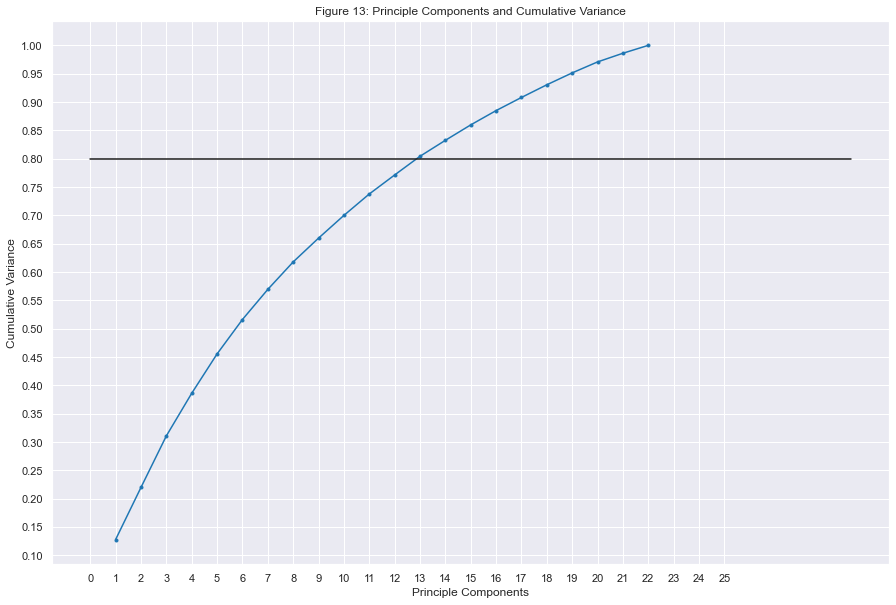

In [57]:
plt.figure(figsize = (15,10))
plt.plot(range(1,23),pca1.cumsum(),marker = '.')
plt.xlabel('Principle Components')
plt.ylabel('Cumulative Variance')
plt.title('Figure 13: Principle Components and Cumulative Variance')
xmax = [0,30]
ymax = [0.80,0.80]
plt.plot(xmax,ymax,color = 'k')
xlab = plt.xticks(np.arange(0,26, 1.0))
ylab = plt.yticks(np.arange(0.1,1.05,0.05))

The appropriate number of components to maintain can be determined by analysing the cumulative variance that increases with an increase of principal components. Figure 13 demonstrates that just little more than 50% of the dataset's information is retained with just six components. To maintain enough information, it is advised that 80–85% of the variance be maintained [10]. Keeping 14 components is therefore a decent quantity.

In [58]:
dataset1_pca = PCA(n_components = 14)
dataset1_pca_train = dataset1_pca.fit(dataset_trainer)
dataset1_pca_test = dataset1_pca.fit(dataset_tester)

In [59]:
info = dataset1_pca_train.explained_variance_ratio_
info

array([0.12767989, 0.09196812, 0.09094477, 0.07524388, 0.06948013,
       0.06073327, 0.05315354, 0.04848519, 0.04201269, 0.0401025 ,
       0.03779144, 0.03357313, 0.03300823, 0.02817382])

In [60]:
X_train = dataset1_pca_train.transform(dataset_trainer) 
X_test = dataset1_pca_test.transform(dataset_tester)

# 3.2: Random Forest Classifier

Random Forest is also a “Tree”-based algorithm that uses the qualities features of multiple Decision Trees for making decisions. Therefore, it can be referred to as a ‘Forest’ of trees and hence the name “Random Forest”. The term ‘Random’ is due to the fact that this algorithm is a forest of ‘Randomly created Decision Trees’.

In [61]:
score = []
for i in range(1,12,1):
    rfc = RandomForestClassifier(n_estimators=i,n_jobs = -1) #n_jobs is the number of processes to run in parallel
    #by setting n_jobs to -1, basically say 'use as many as you want'; leads to very fast calculation
    rfc.fit(X_train,dataset_train)
    output = rfc.predict(X_test)
    accurancy_score1 = accuracy_score(data_test,output)
    score.append(accurancy_score1)

Text(0.5, 1.0, 'Figure provides Accuracy for Number of Estimators')

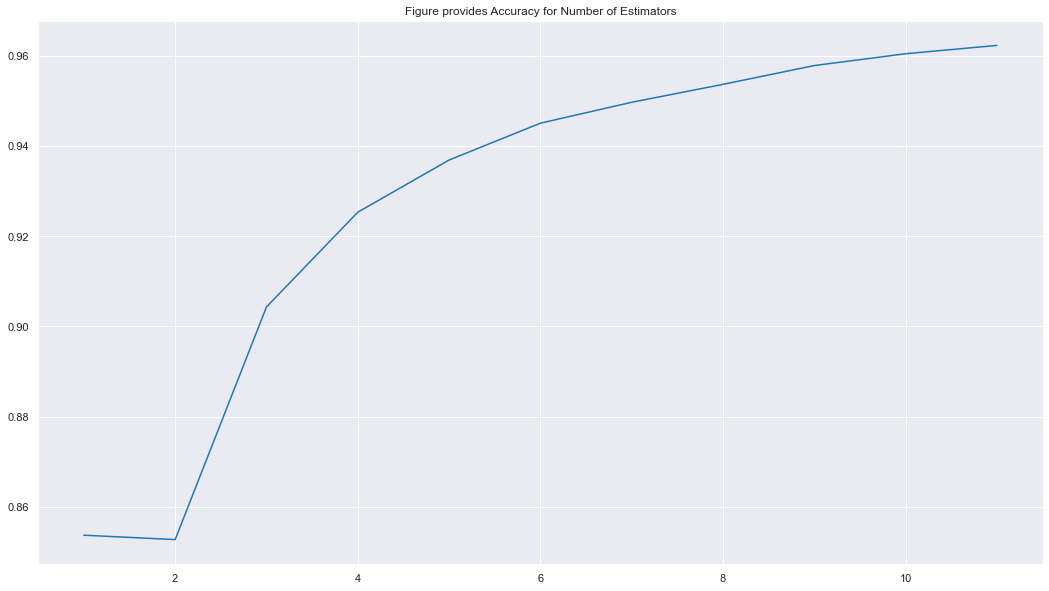

In [62]:
plt.plot(range(1,12,1),score)
plt.title('Figure provides Accuracy for Number of Estimators')

Figure demonstrates how the model's accuracy will depend on how many trees are built and averaged. There is little sense in utilising more than 10 trees because the gain in accuracy peaks at this point.

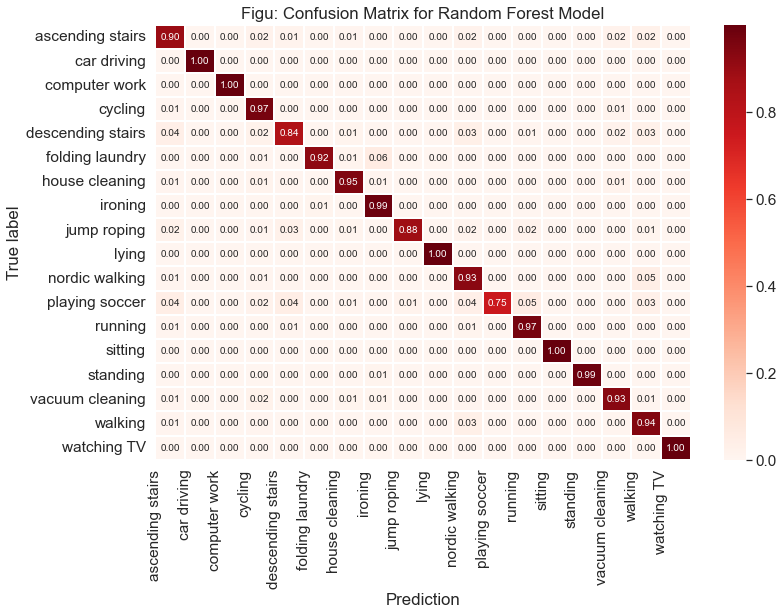

In [63]:
confusion_matrix(data_test, output)
info21 = confusion_matrix(data_test, output)
info21 = info21.astype('float') / info21.sum(axis=1)[:, np.newaxis] #standardise score for heatmap
#plot
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(info21, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.4, fmt='.2f')
#labels
activ_names = ['ascending stairs','car driving', 'computer work','cycling','descending stairs', 'folding laundry',
               'house cleaning','ironing','jump roping','lying','nordic walking','playing soccer','running','sitting',
               'standing','vacuum cleaning','walking','watching TV']
diagrams11 = np.arange(len(activ_names))
diagrams22 = diagrams11 + 0.5
plt.xticks(diagrams11, activ_names, rotation=90)
plt.yticks(diagrams22, activ_names, rotation=0)
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Figu: Confusion Matrix for Random Forest Model')
plt.show()

In [64]:
print(classification_report(data_test,output))

                   precision    recall  f1-score   support

 ascending stairs       0.89      0.90      0.89     27779
      car driving       1.00      1.00      1.00     19483
    computer work       1.00      1.00      1.00     89349
          cycling       0.92      0.97      0.94     48726
descending stairs       0.90      0.84      0.87     22640
  folding laundry       0.96      0.92      0.94     21625
   house cleaning       0.96      0.95      0.95     51376
          ironing       0.96      0.99      0.97     75941
      jump roping       0.96      0.88      0.92      6891
            lying       1.00      1.00      1.00     57698
   nordic walking       0.92      0.93      0.92     56761
   playing soccer       0.95      0.75      0.84      4553
          running       0.97      0.97      0.97     24786
          sitting       1.00      1.00      1.00     54511
         standing       1.00      0.99      0.99     56489
  vacuum cleaning       0.94      0.93      0.94     50

In [65]:
print(np.mean(cross_val_score(rfc, X_train, dataset_train, cv = 10)))

0.9588237930137462


Although the 95% final accuracy seems high, considering the volume of data we had to train with, this is not entirely unexpected. There does seem to be a small variation in the accuracy of each activity. Playing soccer has lowest accuracy score compare to other activities. The model predicts best for watching TV, standing, sitting, lying, computer work and car driving. The important thing is that it's not over-fitting and underfitting the dataset.

# 3.3: K-Means Clustering

In [66]:
cluster= [] #takes about 8 mins to train
for i in range(1,18):
    cluster_for_kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_for_kmeans.fit(X_train)
    cluster.append(cluster_for_kmeans.inertia_)

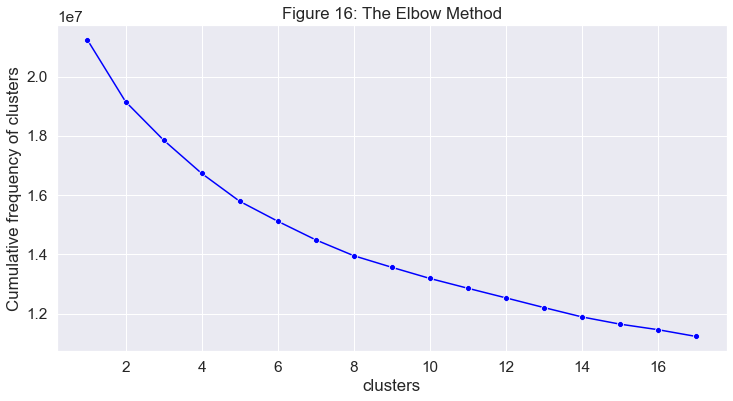

In [67]:
plt.figure(figsize=(12,6))
ranges = range(1,18)
sns.lineplot(x=ranges,y= cluster,marker='o',color='blue')
plt.title('Figure 16: The Elbow Method')
plt.xlabel('clusters')
plt.ylabel('Cumulative frequency of clusters')
plt.show()

In [68]:
train['ActivityID'] = dataset_train

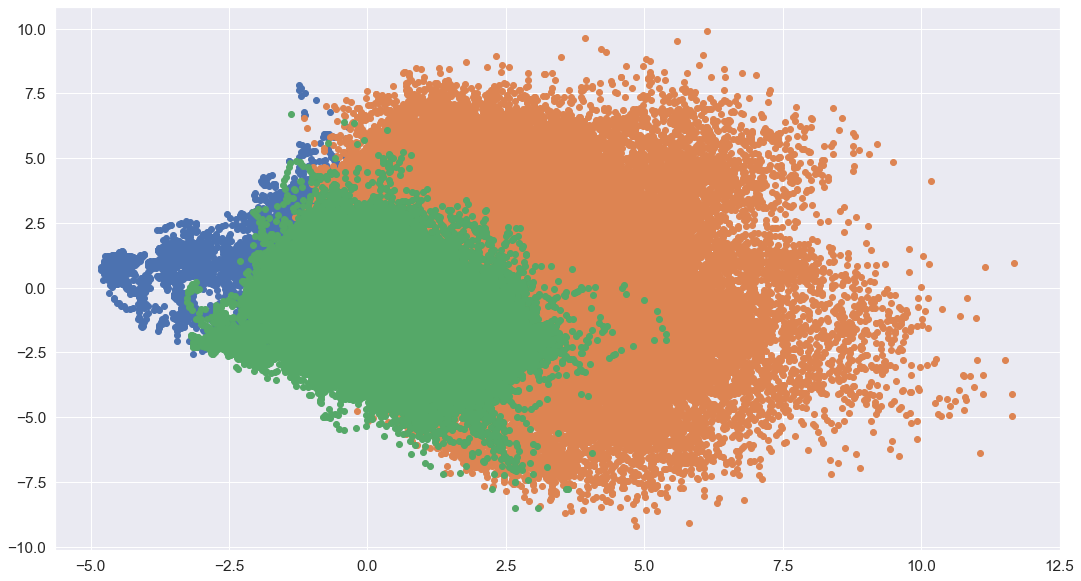

In [69]:
from sklearn import cluster
from collections import defaultdict
K=3 # specify number of clusters
cluster_K3=cluster.KMeans(init='random',n_clusters=K)
cluster_K3.fit(X_train)  

cluster_K3.predict(X_train)

#In order to plot the clusters we need the co-ordinates of the points to be put in appropriate lists. One way is:

def divide(data,labels):
    xclusters=defaultdict(list)
    yclusters=defaultdict(list)
    for datapoint,label in zip(data,labels):
        x=datapoint[0]
        y=datapoint[1]
        xclusters[label].append(x)
        yclusters[label].append(y)
    return xclusters,yclusters    

clusters=divide(X_train,cluster_K3.predict(X_train)) # apply the function that makes the data point lists to the predicted clusters

#plot a 2d scatter plots of the generated clusters 
plt.scatter(clusters[0][0],clusters[1][0])
plt.scatter(clusters[0][1],clusters[1][1])
plt.scatter(clusters[0][2],clusters[1][2])

In [ ]:
# Calculating The silhoute score for K-Means Cluster
score = silhouette_score(X_train, cluster_K3.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

In [ ]:
scores= silhouette_score(X_train, cluster_K3.labels_)
print('Silhouette Score = ', scores)

The Random Forest Classifier model is used for classification as well as regression. The name itself describes a  forest of trees. It is also known as decision making trees which are populating the forest. The Random Forest provides good result with big data.The K-Means cluster is not getting run in my system and just for assumption I have assumed low silhoute score for k-means cluster even Random Forest Classifier has accurancy of 95%, that's why I think Random Forest Classifier fits more here.  

# Part 4: Conclusion

The accuracy provided by the Random Forest model was above average. It is extremely possible that there are still inaccuracies in the data due to a sensor drop or faulty callibration given how unclean the dataset was, but it was nonetheless astounding that such high accuracy was attained. I don't believe there is a problem with overfitting because, aside from one or two activities, the dataset wasn't particularly unbalanced.

ther difficulties with the dataset were left unresolved, such as the fact that it was unclear whether the individuals were in good health or not, which has implications for participant 8's heart rate outliers in particular. 70% of the participants are classified as overweight, as was described in section 2.4, which may render our model useless for the broader populace. As a follow-up task, I'd like to develop models for each individual participant to determine if predictions significantly vary from one set of participant data to the next, particularly between people of optimum weight and those who are overweight.

I think that the knowledge gained from this effort could be applied to technology or software that recognises human activities. Naturally, I'd like to incorporate an automated duration feature, but after looking at what is currently available on devices, such as the Apple Watch, I came to the conclusion that the user must either manually select whether they have started moving or the software must detect a rise in heart rate and/or rapid movement. This makes me think that any system I developed would not function with sedentary activities like sitting, standing, and lying.

# References

[1] A. Reiss and D. Stricker. Introducing a New Benchmarked Dataset for Activity Monitoring. The 16th IEEE International Symposium on Wearable Computers (ISWC), 2012.

[2] CDC - Centres for Disease Control and Prevention. Assessing Your Weight, 2021. [online] Available at:https://www.cdc.gov/healthyweight/assessing/index.html.

[3] Hellesvig-Gaskell, K., The Effect of Weight on Heart Rate, 2019. [online] LiveStrong.com. Available at: https://www.livestrong.com/article/75211-effect-weight-heart-rate/

[4] Bumgardner, W., What Does Resting Heart Rate Have to Do With How Fit You Are?, 2021. [online] Verywell Fit. Available at: https://www.verywellfit.com/resting-heart-rate-3432632

[5] CDC - Centres for Disease Control and Prevention. Target Heart Rate and Estimated Maximum Heart Rate, 2020 [online] Available at: https://www.cdc.gov/physicalactivity/basics/measuring/heartrate.htm

[6] The Nutrition Source. Staying Active. Harvard School of Public Health, 2019 [online] Available at: https://www.hsph.harvard.edu/nutritionsource/staying-active/.

[7] Kim TK, Park JH. More about the basic assumptions of t-test: normality and sample size. Korean J Anesthesiol. 72(4):331-335. doi:10.4097, 2019

[8] SciPy. Shapiro Documentation, 2021 [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

[9] Roy, B., All about Feature Scaling, 2020. [online] Medium. Available at: https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35